## Arewa Data Science Academy
### Deep Learning Cohort1.0

#### Name: Sani Aji
#### Email: saniajy@gmail.com
#### Title: Week 2 Solution

#### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).

In [1]:

#Q: Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

#Let start by importing required libraries

# Import PyTorch and matplotlib

import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version

torch.__version__



'2.1.0+cu121'

In [11]:
# Create weight and bias
# In this case, we are given the weights and bias, so, no need to initialize them randomly
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.01 #from 0 t0 1 with 0.01 step ->100 data points

# Create X and y (features and labels) # we will use both the features and the labels to train our model
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
print(X[:10], y[:10]) #the data has 100 data points for both features X and labes y, but to see the first 10 points, we pass 10. We can adjust to see more
print(len(X)) #checking the number of data points of the features
print(len(y)) #checking the number of data points of the labels




tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])
100
100


In [12]:
#Q: Split the data into 80% training, 20% testing.

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split] #taking 80% of the data for training
X_test, y_test = X[train_split:], y[train_split:] #taking 20% for testing

len(X_train), len(y_train), len(X_test), len(y_test)



(80, 80, 20, 20)

In [23]:
#Q: Plot the training and testing data so it becomes visual.
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(7, 5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

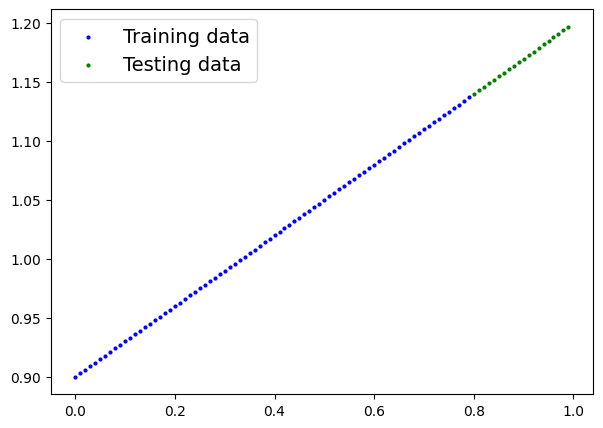

In [24]:
plot_predictions();

#### 2. Building a PyTorch model by subclassing nn.Module.

In [25]:
#Q: Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

# Creating a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

#Q: Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)



In [27]:
#Q: Once you've constructed the model, make an instance of it and check its state_dict()

# Set manual seed since nn.Parameter are randomly initialzied.
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
#Checking what the model contains using .state_dict().
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [30]:
# Creating the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [31]:
#Training our model

torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.7566978335380554 | MAE Test Loss: 0.7248174548149109 
Epoch: 20 | MAE Train Loss: 0.5254928469657898 | MAE Test Loss: 0.4541124403476715 
Epoch: 40 | MAE Train Loss: 0.2942880392074585 | MAE Test Loss: 0.18340764939785004 
Epoch: 60 | MAE Train Loss: 0.07658576965332031 | MAE Test Loss: 0.07274086028337479 
Epoch: 80 | MAE Train Loss: 0.05255373567342758 | MAE Test Loss: 0.11581540107727051 
Epoch: 100 | MAE Train Loss: 0.045542728155851364 | MAE Test Loss: 0.10467890650033951 
Epoch: 120 | MAE Train Loss: 0.03868866711854935 | MAE Test Loss: 0.08938358724117279 
Epoch: 140 | MAE Train Loss: 0.03183453157544136 | MAE Test Loss: 0.07408786565065384 
Epoch: 160 | MAE Train Loss: 0.024982359260320663 | MAE Test Loss: 0.0581042543053627 
Epoch: 180 | MAE Train Loss: 0.018130185082554817 | MAE Test Loss: 0.04212062805891037 
Epoch: 200 | MAE Train Loss: 0.011278990656137466 | MAE Test Loss: 0.02579306997358799 
Epoch: 220 | MAE Train Loss: 0.004429381340742111 |

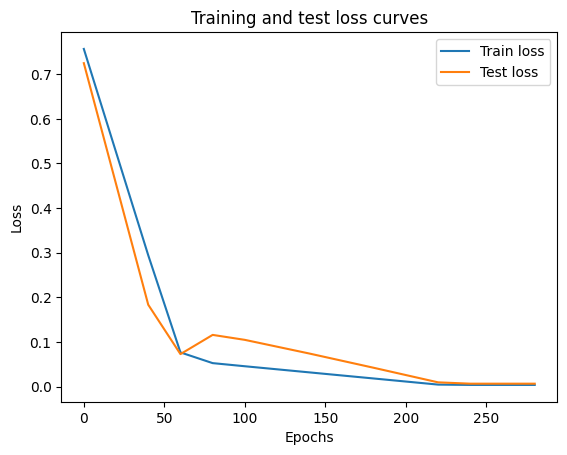

In [32]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [33]:
#Let us see the learned parameters
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


#### 4. Make predictions with the trained model on the test data.

In [34]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

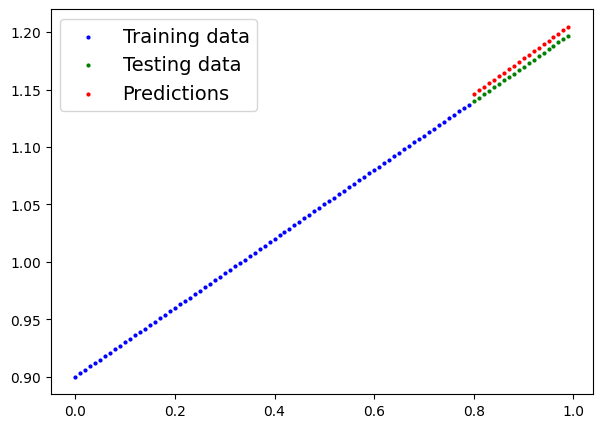

In [35]:
#Visualizing the prediction

plot_predictions(predictions=y_preds)

#### 5. Save your trained model's state_dict() to file.

In [36]:

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [37]:
## Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Dec 28 14:22 models/01_pytorch_workflow_model_0.pth


In [38]:
#Q: Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [40]:
#Q: Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

#Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.

In [41]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])